In [1]:
import os
import shutil
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
!unzip Data.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Data PreProcessing

In [4]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
data_dir = 'Data'
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Create directories for the split data
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to split data
def split_data(class_dir, train_dir, val_dir, test_dir, test_size=0.20):
    # Get filenames
    files = os.listdir(class_dir)
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
    test_files, val_files = train_test_split(test_files, test_size=0.50, random_state=42)

    # Copy files to train, val, and test directories
    for file in train_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(val_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(test_dir, file))

# Iterate over each class and split the data
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)

    # Create class directories in train, val, and test
    for directory in [train_dir, val_dir, test_dir]:
        class_directory = os.path.join(directory, class_name)
        if not os.path.exists(class_directory):
            os.makedirs(class_directory)

    # Split and copy files
    split_data(class_dir, os.path.join(train_dir, class_name), os.path.join(val_dir, class_name), os.path.join(test_dir, class_name))

print("Data split into train, validation, and test sets.")

Data split into train, validation, and test sets.


## Data Distribution

In [5]:
# Directory paths
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Classes
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']

# Function to calculate size of each class
def calculate_class_sizes(dir_path, classes):
    return {class_name: len(os.listdir(os.path.join(dir_path, class_name))) for class_name in classes}

# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 4448 images
 - Calculus: 1036 images (23.29% of train set)
 - Caries: 175 images (3.93% of train set)
 - Gingivitis: 1879 images (42.24% of train set)
 - hypodontia: 1000 images (22.48% of train set)
 - Ulcer: 212 images (4.77% of train set)
 - Tooth Discoloration: 146 images (3.28% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


C:\Users\houma\AppData\Local\Temp\ipykernel_25804\2005837930.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names, rotation=45, ha='right')
C:\Users\houma\AppData\Local\Temp\ipykernel_25804\2005837930.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names, rotation=45, ha='right')
C:\Users\houma\AppData\Local\Temp\ipykernel_25804\2005837930.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names, rotation=45, ha='right')


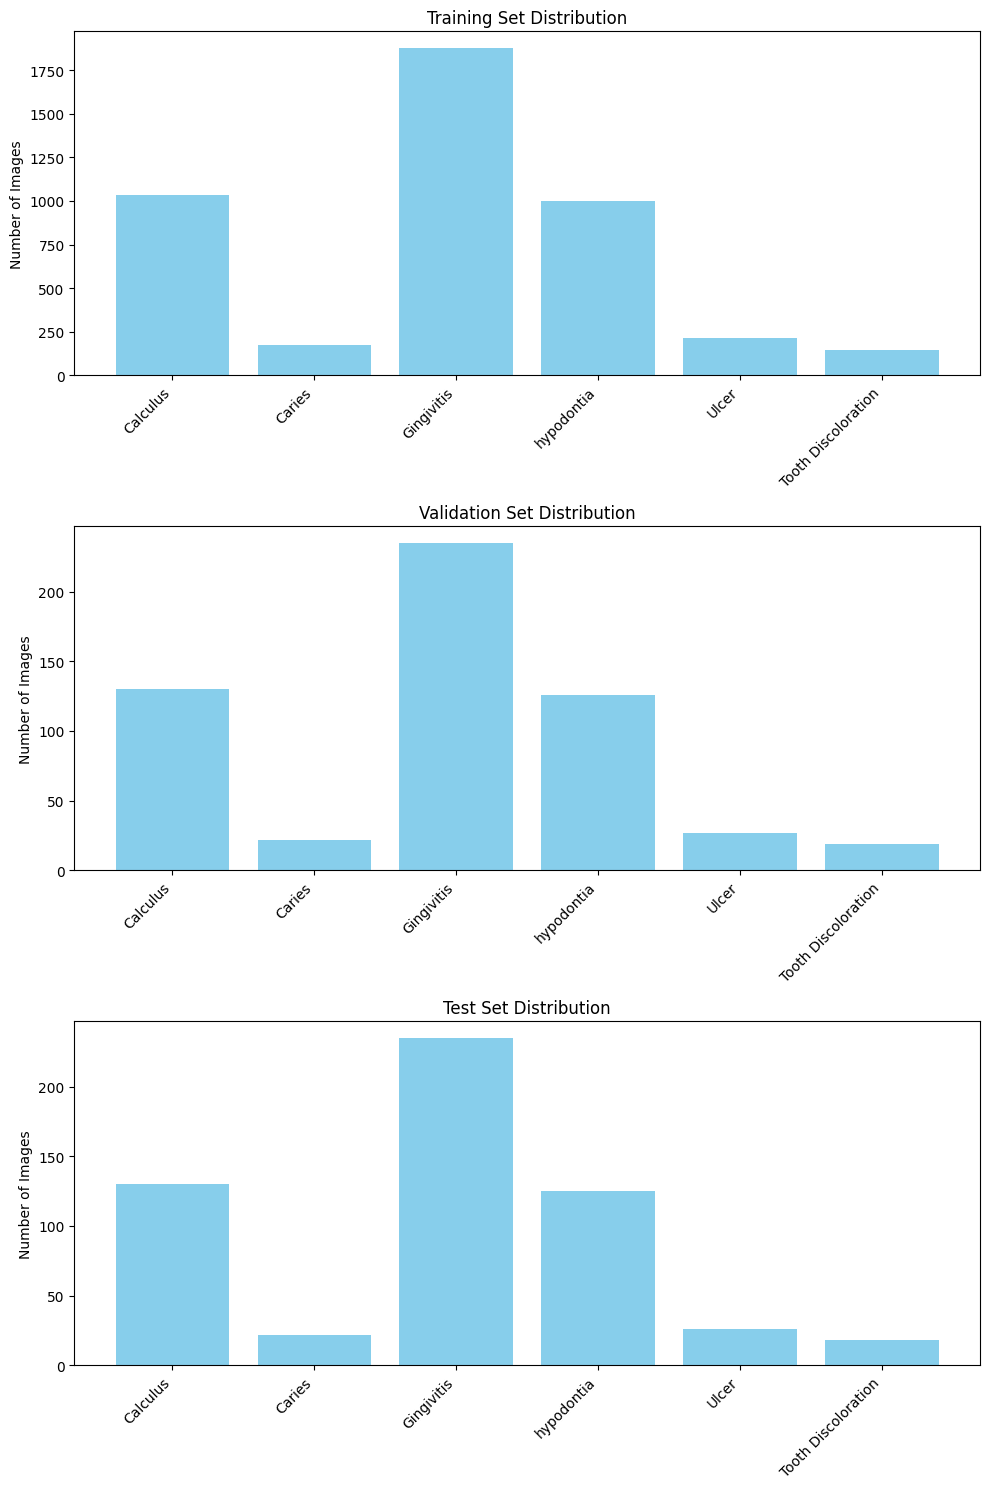

In [6]:
import matplotlib.pyplot as plt

# Assuming the sizes are already calculated as in your previous code
# train_sizes, val_sizes, test_sizes

# Data for plotting
class_names = list(train_sizes.keys())
train_counts = list(train_sizes.values())
val_counts = list(val_sizes.values())
test_counts = list(test_sizes.values())

# Function to create a bar plot
def create_bar_plot(ax, counts, title):
    ax.bar(class_names, counts, color='skyblue')
    ax.set_title(title)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_ylabel('Number of Images')

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot data
create_bar_plot(axes[0], train_counts, 'Training Set Distribution')
create_bar_plot(axes[1], val_counts, 'Validation Set Distribution')
create_bar_plot(axes[2], test_counts, 'Test Set Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
pip install keras


     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.1 MB 3.5 MB/s eta 0:00:01
   ------------------------ --------------- 0.7/1.1 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 8.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.7 MB 21.8 MB/s eta 0:00:01
   --------------------------------- ------ 2.2/2.7 MB 28.5 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 21.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.5 kB ? eta -:--:--
   -------------------------

In [ ]:
pip install tensorflow

  Using cached setuptools-69.2.0-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/377.1 MB 9.4 MB/s eta 0:00:41
   ---------------------------------------- 2.0/377.1 MB 21.0 MB/s eta 0:00:18
   ---------------------------------------- 3.9/377.1 MB 27.4 MB/s eta 0:00:14
    --------------------------------------- 6.5/377.1 MB 37.8 MB/s eta 0:00:10
    --------------------------------------- 8.2/377.1 MB 37.4 MB/s eta 0:00:10
   - -------------------------------------- 10.6/377.1 MB 46.9 MB/s eta 0:00:08
   - -------------------------------------- 12.3/377.1 MB 46.9 MB/s eta 0:00:08
   - -------------------------------------- 13.6/377.1 MB 46.7 MB/s eta 0:00:08
   - -------------------------------------- 14.9/377.1 MB 40.9 MB/s eta 0:00:09
   - -------------------------------------- 16.9/377.1 MB 38.5 MB/s eta 0:00:10
   -- ------------------------------------- 19.5/377.1 MB 40.9 MB/s

In [ ]:
pip install --upgrade --force-reinstall keras


Note: you may need to restart the kernel to use updated packages.Collecting keras
  Using cached keras-3.1.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 651.3 kB/s eta 0:00:00
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.7-py3-none-any.whl.metadata (246 bytes)
  Using cached h5py-3.10.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached optree-0.11.0-cp312-cp312-win_amd64.whl.metadata (46 kB)
  Using cached ml_dtypes-0.4.0-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached typing_extensions-4.10.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached pygments-2.17.2-py3-none-any.whl.metadata (2.6 kB)
  Usi

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.4.0 which is incompatible.


## OverSampling (Class Imbalance Correction)

In [12]:
import random
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'Train'

# Function to perform oversampling
def oversample_class(class_dir, target_count):
    files = os.listdir(class_dir)
    while len(files) < target_count:
        chosen_file = random.choice(files)
        new_file = f'oversampled_{random.randint(1, 10000)}_{chosen_file}'
        shutil.copy(os.path.join(class_dir, chosen_file), os.path.join(class_dir, new_file))
        files.append(new_file)

target_counts = {
    'Caries': 1000,
    'Ulcer': 1000,
    'Tooth Discoloration': 1000
}

for class_name, target_count in target_counts.items():
    class_dir = os.path.join(train_dir, class_name)
    oversample_class(class_dir, target_count)


In [16]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 6915 images
 - Calculus: 1036 images (14.98% of train set)
 - Caries: 1000 images (14.46% of train set)
 - Gingivitis: 1879 images (27.17% of train set)
 - hypodontia: 1000 images (14.46% of train set)
 - Ulcer: 1000 images (14.46% of train set)
 - Tooth Discoloration: 1000 images (14.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


In [17]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 6915 images
 - Calculus: 1036 images (14.98% of train set)
 - Caries: 1000 images (14.46% of train set)
 - Gingivitis: 1879 images (27.17% of train set)
 - hypodontia: 1000 images (14.46% of train set)
 - Ulcer: 1000 images (14.46% of train set)
 - Tooth Discoloration: 1000 images (14.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


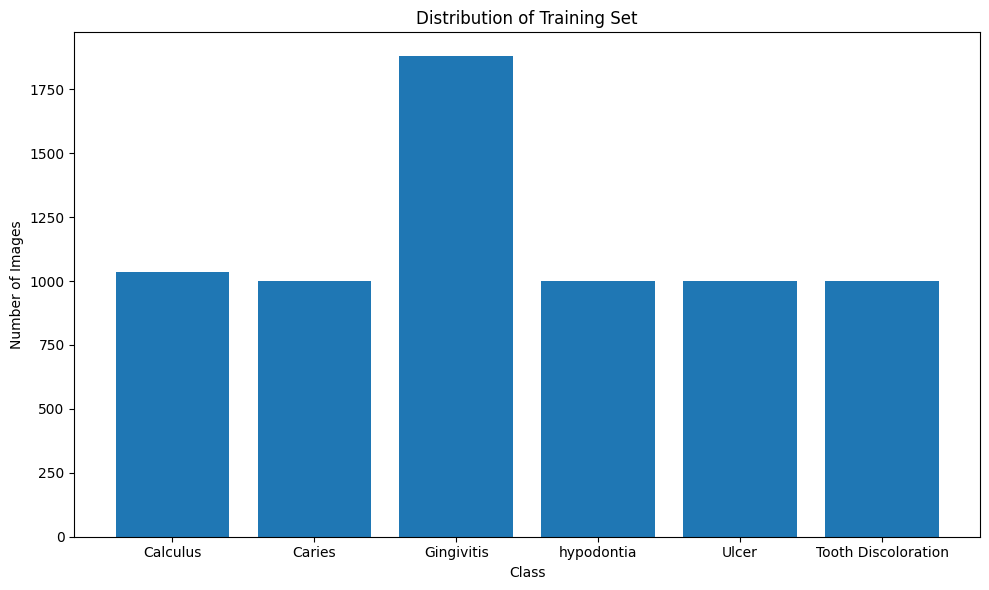

In [18]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

## Data Visualization

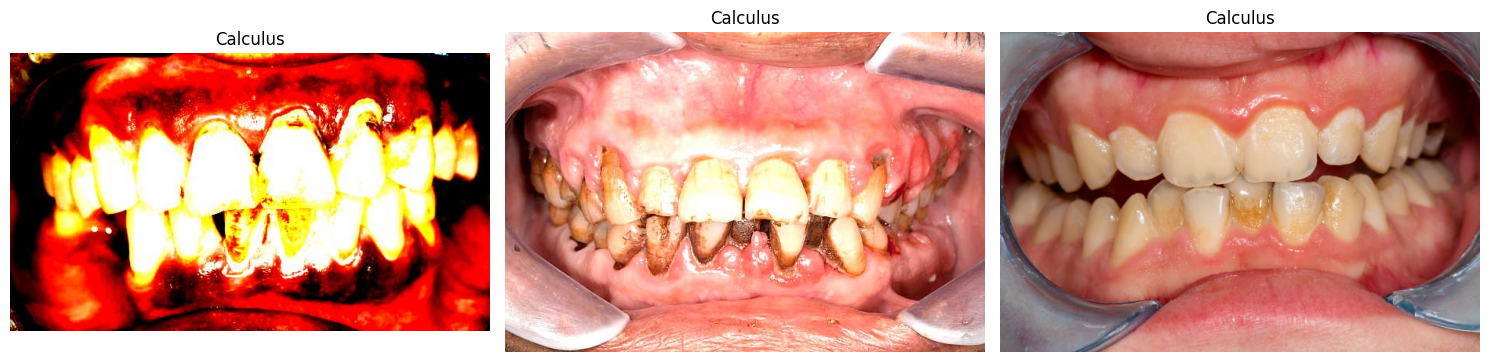

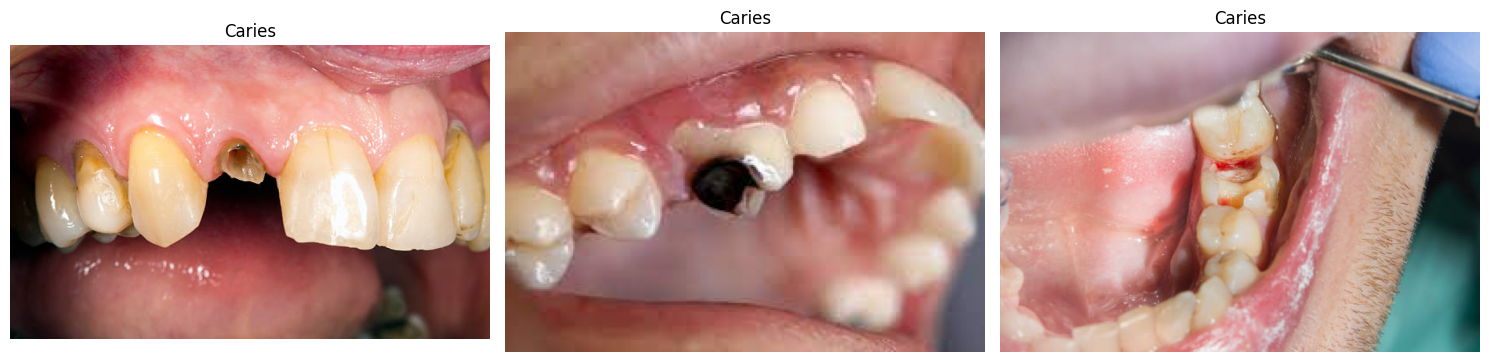

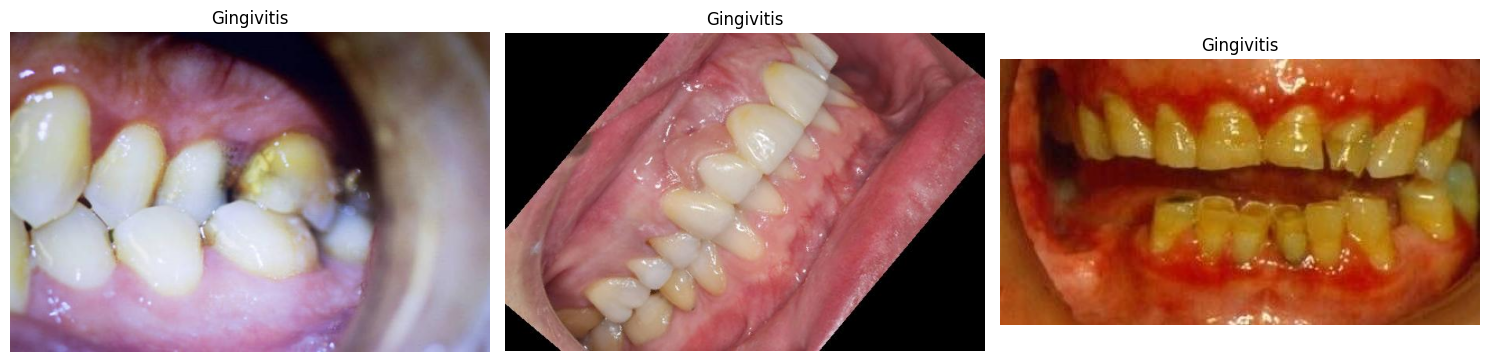

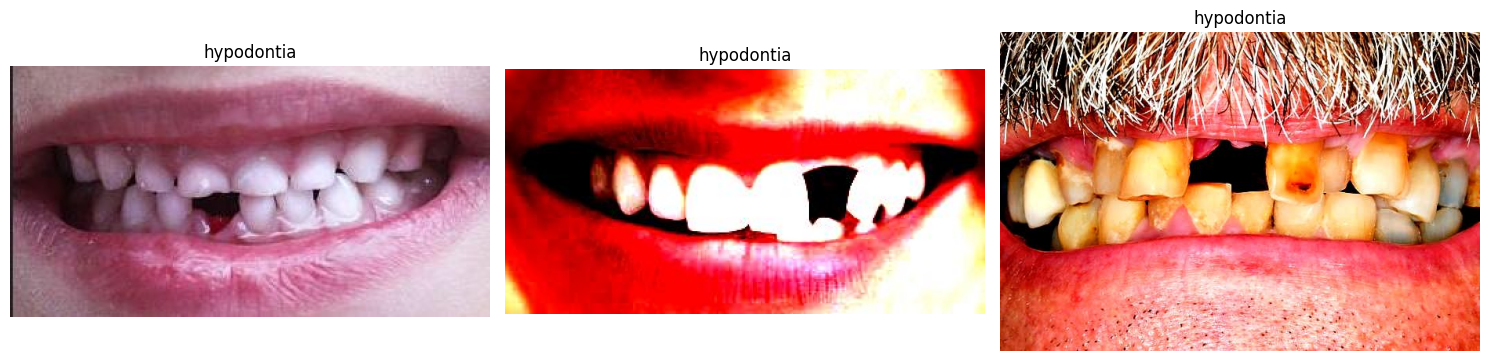

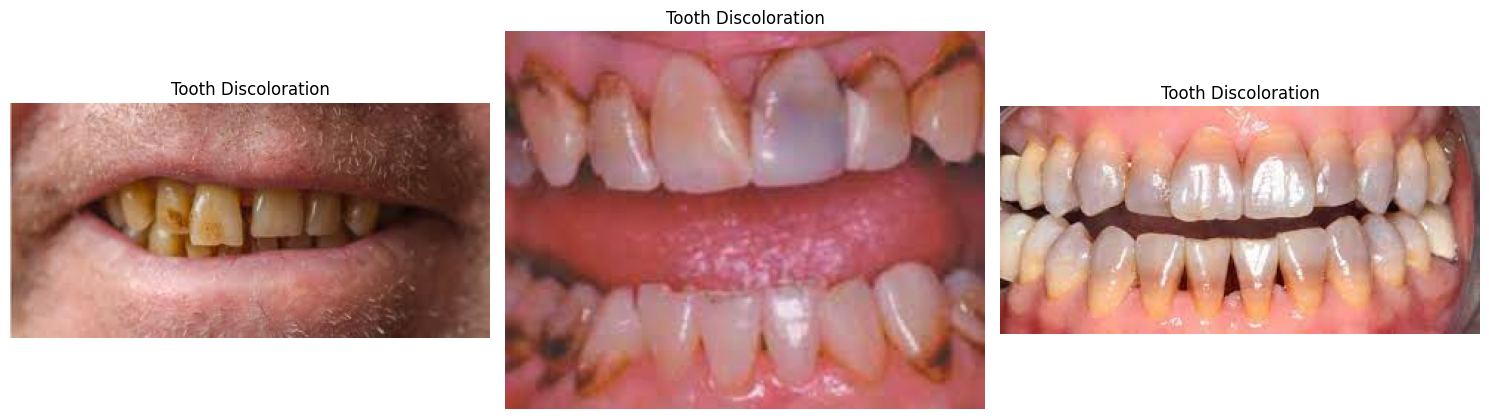

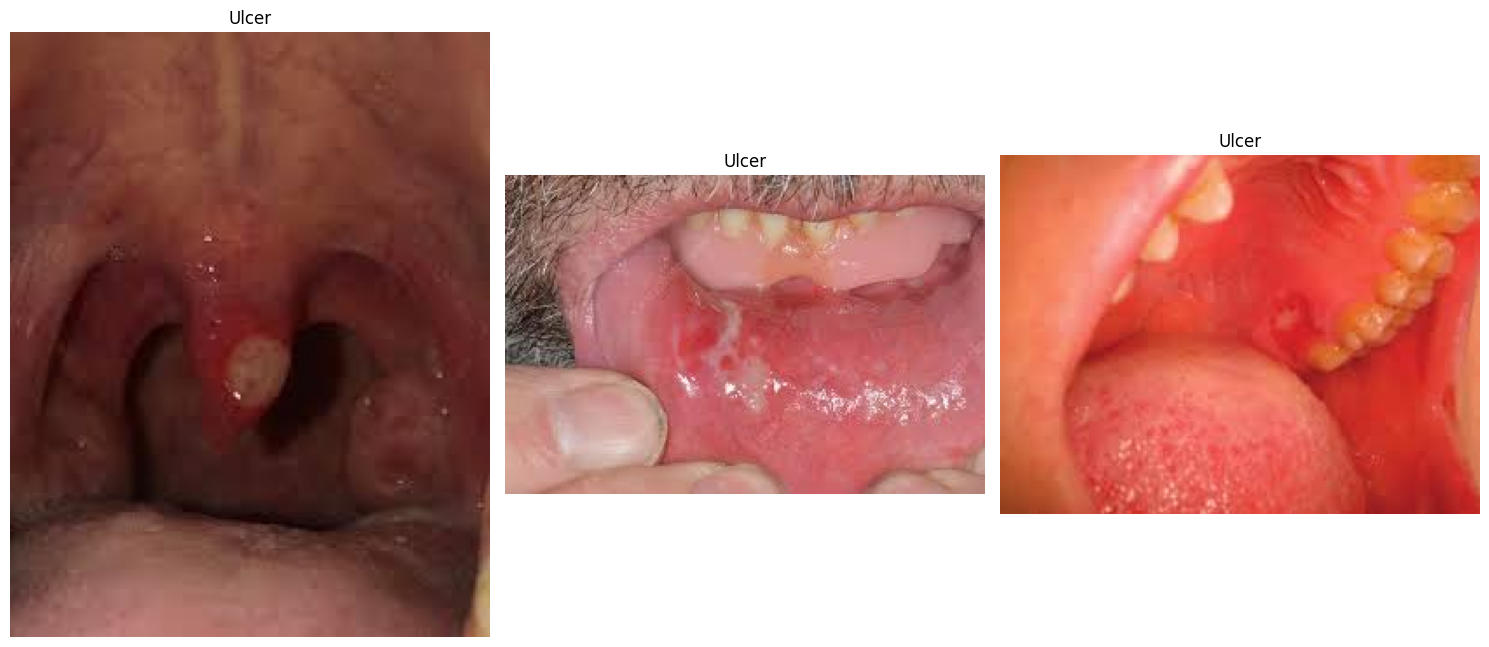

In [19]:
from PIL import Image

def display_images(image_paths, cols=3, rows=2, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    for img_path, ax in zip(image_paths, axes):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(os.path.dirname(img_path)))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

data_dir = 'Train'
num_images_to_display = 3  # Number of images to display for each class

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = os.listdir(class_dir)
        selected_images = random.sample(image_files, min(len(image_files), num_images_to_display))
        selected_image_paths = [os.path.join(class_dir, img) for img in selected_images]
        display_images(selected_image_paths, cols=num_images_to_display, rows=1)

# Baseline Model (RF and LR)

In [20]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from PIL import Image

def load_images(train_dir_, size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(train_dir_)

    for class_name in class_names:
        class_dir = os.path.join(train_dir_, class_name)
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            images.append(np.array(img).flatten())
            labels.append(class_names.index(class_name))

    return np.array(images), np.array(labels), class_names

# Load and preprocess the data
train_dir_ = 'Train'
X_train, y_train, class_names = load_images(train_dir_)

val_dir_ = 'Val'
X_val, y_val, class_names = load_images(val_dir_)

test_dir_= 'Test'
X_test,y_test, class_names = load_images(test_dir_)

# Splitting dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance


X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_train)


# Logistic Regression Model (as an example of a simpler model)
log_reg_model = LogisticRegression(max_iter=1000, solver= 'saga')
log_reg_model.fit(X_train_pca, y_train)
y_pred_lr = log_reg_model.predict(X_val_pca)
print("Logistic Regression Model Performance:")
print(classification_report(y_val, y_pred_lr, target_names=class_names))

'''

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_testval)
print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

'''

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_val_pca)
print("Random Forest Model Performance:")
print(classification_report(y_val, y_pred_rf, target_names=class_names))

Logistic Regression Model Performance:
                     precision    recall  f1-score   support

           Calculus       0.51      0.50      0.51       130
             Caries       0.26      0.41      0.32        22
         Gingivitis       0.72      0.63      0.68       235
         hypodontia       0.76      0.66      0.71       126
Tooth Discoloration       0.22      0.42      0.29        19
              Ulcer       0.49      0.81      0.61        27

           accuracy                           0.60       559
          macro avg       0.49      0.57      0.52       559
       weighted avg       0.64      0.60      0.61       559

Random Forest Model Performance:
                     precision    recall  f1-score   support

           Calculus       0.62      0.54      0.58       130
             Caries       0.83      0.23      0.36        22
         Gingivitis       0.65      0.80      0.72       235
         hypodontia       0.76      0.84      0.80       126
Tooth Dis

## Data Augmentation

In [21]:
import tensorflow as tf


# Define augmentation settings
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


def augment_class_images(class_dir, augment_times, is_underrepresented):
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path)
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img.reshape((1,) + img.shape)  # Reshape image

        # Adjust augmentation times for underrepresented classes
        if is_underrepresented:
            actual_augment_times = augment_times
        else:
            actual_augment_times = augment_times // 4  # Reduce for well-represented classes

        # Generate augmented images
        i = 0
        for batch in data_gen.flow(img, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= actual_augment_times:
                break

# Define which classes are underrepresented
underrepresented_classes = ['Caries', 'Ulcer', 'Tooth Discoloration']

# Apply augmentation
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    is_underrepresented = class_name in underrepresented_classes
    augment_class_images(class_dir, augment_times=2, is_underrepresented=is_underrepresented)

In [22]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 15989 images
 - Calculus: 2027 images (12.68% of train set)
 - Caries: 2836 images (17.74% of train set)
 - Gingivitis: 3574 images (22.35% of train set)
 - hypodontia: 1937 images (12.11% of train set)
 - Ulcer: 2814 images (17.60% of train set)
 - Tooth Discoloration: 2801 images (17.52% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


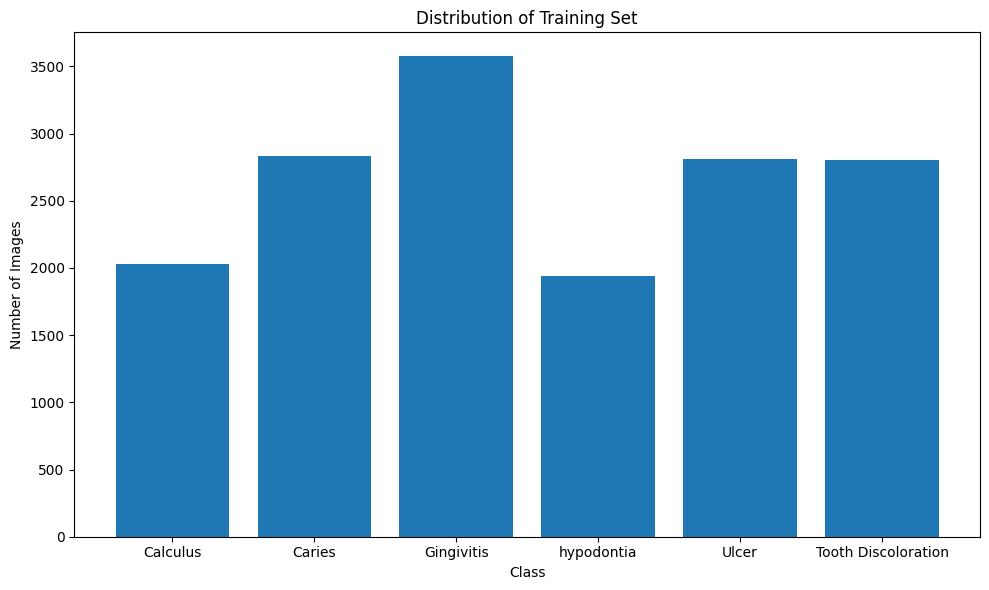

In [23]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

In [25]:
pip install torchvision

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.2 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 12.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/198.5 MB ? eta -:--:--
   ---------------------------------------- 1.7/198.5 MB 35.3 MB/s eta 0:00:06
    --------------------------------------- 3.0/198.5 MB 38.2 MB/s eta 0:00:06
   - -------------------------------------- 5.4/198.5 MB 38.5 MB/s eta 0:00:06
   - -------------------------------------- 7.7/198.5 MB 41.1 MB/s eta 0:00:05
   - -------------------------------------- 9.5/198.5 MB 40.3 MB/s eta 0:00:05
   -- ------------------------------------- 11.2/198.5 MB 40.9 MB/s eta 0:00:05
   -- ------------------------------------- 13.4/198.5 MB 43.7 MB/s eta 0:00:05
   --- ------------------------------------ 15.8/198.5 MB 43.7 MB/s eta 0:0

## Data Normalization Process

In [26]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = ImageFolder(root='Train', transform=transform)
loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

mean = 0.
std = 0.
nb_samples = 0.
for data, _ in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: tensor([0.6816, 0.4507, 0.4133])
Std: tensor([0.2056, 0.2262, 0.2105])


# Primary Model

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import time

# Define the CNN Architecture
class OralCNN(nn.Module):
    def __init__(self):
        super(OralCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  #smaller kernel on first conv layer
        self.conv2 = nn.Conv2d(32, 64, 7, padding=1) #bigger kernel on second layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 30 * 30, 512)
        self.fc2 = nn.Linear(512, 6)  # 6 classes
        self.dropout = nn.Dropout(0.25) #dropout for regularization
        self.name = "OralClassifier"

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 30 * 30)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

mean = [0.6828, 0.4591, 0.4221]
std = [0.2034, 0.2248, 0.2094]

# Define the transform including resizing and normalization
common_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load training and validation datasets with these transforms
train_dataset = ImageFolder(root='Train', transform=common_transforms)
val_dataset = ImageFolder(root='Val', transform=common_transforms)
test_dataset = ImageFolder(root='Test',transform=common_transforms)

model = OralCNN()

## Training

In [30]:

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path



def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [31]:

def train_model(model, batch_size=64, learning_rate=0.01, num_epochs=3):
    torch.manual_seed(1000)

    # Use GPU if available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)



    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum= 0.9, weight_decay= 1e-8)

    #implementing weight decay with L2 regularization
    #optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)


    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = 3)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers= 3)

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()  # Start the timer

    for epoch in range(num_epochs):  # Loop over the dataset multiple times

        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0

        # Training
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):  # Iterate over the batches
            # Transfer data to the device
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train_err += (predicted != labels).sum().item()
            total_epoch += labels.size(0)

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)

        # Validation
        total_val_loss = 0.0
        total_val_err = 0.0
        total_epoch = 0

        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val_err += (predicted != labels).sum().item()
                total_epoch += labels.size(0)

        val_err[epoch] = float(total_val_err) / total_epoch
        val_loss[epoch] = float(total_val_loss) / len(val_loader)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train err: {train_err[epoch]:.4f}, Train acc: {100 - (train_err[epoch] * 100)}%, Train loss: {train_loss[epoch]:.4f}, Validation err: {val_err[epoch]:.4f}, Validation acc: {100 - (val_err[epoch] * 100)}%, Validation loss: {val_loss[epoch]:.4f}')

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Total time elapsed: {elapsed_time:.2f} seconds')

    # Save metrics
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)

In [32]:
train_model(model, batch_size=128, learning_rate=0.001, num_epochs=20)

Epoch 1/20, Train err: 0.6385, Train acc: 36.14985302395397%, Train loss: 1.5698, Validation err: 0.5027, Validation acc: 49.731663685152064%, Validation loss: 1.3410
Epoch 2/20, Train err: 0.5107, Train acc: 48.93364187879167%, Train loss: 1.3230, Validation err: 0.4436, Validation acc: 55.635062611806795%, Validation loss: 1.1504
Epoch 3/20, Train err: 0.4377, Train acc: 56.23240978172493%, Train loss: 1.1491, Validation err: 0.4150, Validation acc: 58.49731663685152%, Validation loss: 1.1548
Epoch 4/20, Train err: 0.3809, Train acc: 61.90505972856339%, Train loss: 1.0229, Validation err: 0.3542, Validation acc: 64.57960644007156%, Validation loss: 0.9469
Epoch 5/20, Train err: 0.3474, Train acc: 65.2636187378823%, Train loss: 0.9220, Validation err: 0.3292, Validation acc: 67.08407871198568%, Validation loss: 0.8309
Epoch 6/20, Train err: 0.3173, Train acc: 68.2719369566577%, Train loss: 0.8477, Validation err: 0.2987, Validation acc: 70.12522361359571%, Validation loss: 0.7625
Epoc

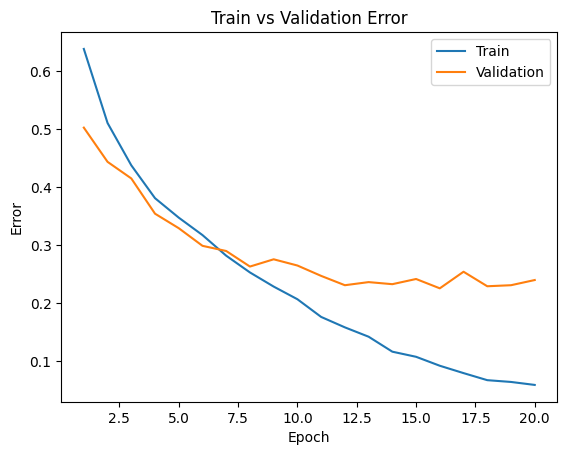

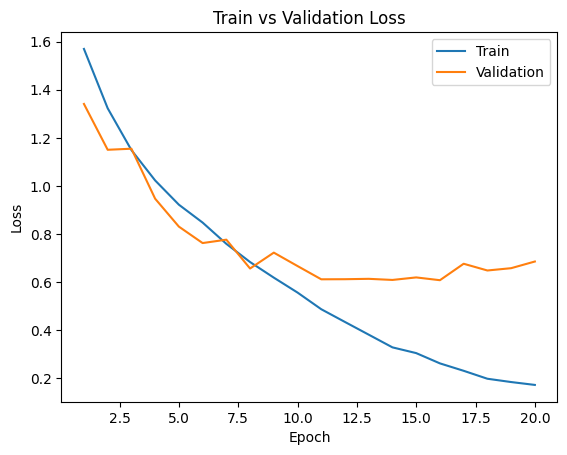

In [33]:
model_path = get_model_name("OralClassifier", batch_size= 128, learning_rate= 0.001, epoch=19)
plot_training_curve(model_path)

# AutoEncoder + Classifier Testing (Not Great)

In [34]:
'''
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1), # 128x128x3 -> 64x64x32
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1), # 64x64x32 -> 32x32x64
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 32x32x64 -> 16x16x128
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 16x16x128 -> 8x8x256
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 8x8x256 -> 16x16x128
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1), # 16x16x128 -> 32x32x64
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1), # 32x32x64 -> 64x64x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1), # 64x64x32 -> 128x128x3
            nn.Sigmoid()  # Output pixel values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    '''


'\nclass Autoencoder(nn.Module):\n    def __init__(self):\n        super(Autoencoder, self).__init__()\n        # Encoder\n        self.encoder = nn.Sequential(\n            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1), # 128x128x3 -> 64x64x32\n            nn.ReLU(),\n            nn.Dropout2d(0.2),  # Dropout layer for regularization\n            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1), # 64x64x32 -> 32x32x64\n            nn.ReLU(),\n            nn.Dropout2d(0.2),  # Dropout layer for regularization\n            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 32x32x64 -> 16x16x128\n            nn.ReLU(),\n            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 16x16x128 -> 8x8x256\n            nn.ReLU()\n        )\n\n        # Decoder\n        self.decoder = nn.Sequential(\n            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 8x8x256 -> 16x16x128\n            nn.ReLU(),\n            nn.Dropout2d(0.2),  # Dropout 

In [35]:
'''
# Define the transform including resizing and normalization
common_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load training and validation datasets with these transforms
train_dataset = ImageFolder(root='Train', transform=common_transforms)
val_dataset = ImageFolder(root='Val', transform=common_transforms)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

'''

"\n# Define the transform including resizing and normalization\ncommon_transforms = transforms.Compose([\n    transforms.Resize((128, 128)),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=mean, std=std)\n])\n\n# Load training and validation datasets with these transforms\ntrain_dataset = ImageFolder(root='Train', transform=common_transforms)\nval_dataset = ImageFolder(root='Val', transform=common_transforms)\n\n\ntrain_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)\nval_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)\n\n"

In [36]:
'''

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(26*26*64, 512),  # Adjusted for the output of the autoencoder's encoder
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 6)  # 6 classes
        )

    def forward(self, x):
        x = x.view(-1, 26*26*64)  # Flatten the output of the encoder to fit the fully connected layer
        x = self.fc(x)
        return x
'''

"\n\nclass Classifier(nn.Module):\n    def __init__(self):\n        super(Classifier, self).__init__()\n        self.fc = nn.Sequential(\n            nn.Linear(26*26*64, 512),  # Adjusted for the output of the autoencoder's encoder\n            nn.ReLU(),\n            nn.Dropout(0.5),\n            nn.Linear(512, 6)  # 6 classes\n        )\n\n    def forward(self, x):\n        x = x.view(-1, 26*26*64)  # Flatten the output of the encoder to fit the fully connected layer\n        x = self.fc(x)\n        return x\n"

In [37]:
'''
# Function to train autoencoder
def train_autoencoder(autoencoder, train_loader, num_epochs=20):
    autoencoder.train()
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    losses = []
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in train_loader:
            imgs, _ = data
            imgs = imgs.to(device)  # Move data to device

            optimizer.zero_grad()
            outputs = autoencoder(imgs)
            loss = criterion(outputs, imgs)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * imgs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Autoencoder Training Loss')
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

autoencoder = Autoencoder().to(device)
train_autoencoder(autoencoder, train_loader)

'''

'\n# Function to train autoencoder\ndef train_autoencoder(autoencoder, train_loader, num_epochs=20):\n    autoencoder.train()\n    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)\n    criterion = nn.MSELoss()\n    losses = []\n    device = torch.device(\'cuda\' if torch.cuda.is_available() else \'cpu\')\n\n    for epoch in range(num_epochs):\n        running_loss = 0.0\n        for data in train_loader:\n            imgs, _ = data\n            imgs = imgs.to(device)  # Move data to device\n\n            optimizer.zero_grad()\n            outputs = autoencoder(imgs)\n            loss = criterion(outputs, imgs)\n            loss.backward()\n            optimizer.step()\n\n            running_loss += loss.item() * imgs.size(0)\n\n        epoch_loss = running_loss / len(train_loader.dataset)\n        losses.append(epoch_loss)\n        print(f\'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}\')\n\n    plt.figure(figsize=(10, 5))\n    plt.plot(losses, label=\'Autoencoder Train

In [38]:
'''
def train_classifier(encoder, classifier, train_loader, val_loader, num_epochs=20):
    classifier.train()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    optimizer = optim.Adam(classifier.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    val_losses = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        # Training
        running_loss = 0.0
        correct = 0
        total = 0
        for data in train_loader:
            imgs, labels = data
            imgs, labels = imgs.to(device), labels.to(device)
            features = encoder(imgs).view(-1, 26*26*64)  # Adjusted for flattened output

            optimizer.zero_grad()
            outputs = classifier(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * imgs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / total)
        train_accuracy.append(correct / total)

        # Validation
        val_loss = 0.0
        correct = 0
        total = 0
        classifier.eval()
        with torch.no_grad():
            for data in val_loader:
                imgs, labels = data
                imgs, labels = imgs.to(device), labels.to(device)
                features = encoder(imgs).view(-1, 26*26*64)
                outputs = classifier(features)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * imgs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(val_loss / total)
        val_accuracy.append(correct / total)

        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracy[-1]*100:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracy[-1]*100:.2f}%')

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = Classifier().to(device)
# Make sure the encoder is in eval

'''

'\ndef train_classifier(encoder, classifier, train_loader, val_loader, num_epochs=20):\n    classifier.train()\n    device = torch.device(\'cuda\' if torch.cuda.is_available() else \'cpu\')\n    optimizer = optim.Adam(classifier.parameters(), lr=1e-3)\n    criterion = nn.CrossEntropyLoss()\n    train_losses = []\n    val_losses = []\n    train_accuracy = []\n    val_accuracy = []\n\n    for epoch in range(num_epochs):\n        # Training\n        running_loss = 0.0\n        correct = 0\n        total = 0\n        for data in train_loader:\n            imgs, labels = data\n            imgs, labels = imgs.to(device), labels.to(device)\n            features = encoder(imgs).view(-1, 26*26*64)  # Adjusted for flattened output\n\n            optimizer.zero_grad()\n            outputs = classifier(features)\n            loss = criterion(outputs, labels)\n            loss.backward()\n            optimizer.step()\n\n            running_loss += loss.item() * imgs.size(0)\n            _, predicte

In [39]:
'''

# Setting the device for GPU usage if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder = autoencoder.encoder
encoder.eval()  # Set the encoder to evaluation mode


classifier = Classifier().to(device)


train_classifier(encoder, classifier, train_loader, val_loader, num_epochs=10)

'''

'\n\n# Setting the device for GPU usage if available\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\nencoder = autoencoder.encoder\nencoder.eval()  # Set the encoder to evaluation mode\n\n\nclassifier = Classifier().to(device)\n\n\ntrain_classifier(encoder, classifier, train_loader, val_loader, num_epochs=10)\n\n'

# Transfer Learning

In [40]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

c:\Users\houma\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\houma\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\houma/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100.0%


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # Add this line for importing torch.nn.functional
import torchvision
from torchvision import models, transforms
from torch.utils.data import DataLoader
import os
import time
import numpy as np

# Define a transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder('Train', transform=transform)
val_dataset = torchvision.datasets.ImageFolder('Val', transform=transform)
test_dataset = torchvision.datasets.ImageFolder('Test', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=2)

classes = train_dataset.classes

# Define the classifier
class FeatureClassifier(nn.Module):
    def __init__(self):
        super(FeatureClassifier, self).__init__()
        # Adjusted the number of input channels to match the input data (3 channels)
        self.conv1 = nn.Conv2d(3, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 56 * 56, 128)  # Adjusted the input size based on the output of the first pooling layer
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 6)  # 6 classes as the output
        self.name = "vgg"

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor to match the expected size
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


# Define function to train the model
def train_model_transfer(model, train_loader, val_loader, batch_size, learning_rate, num_epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0
        total_train_err = 0.0
        total_train_batch = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train_err += (predicted != labels).sum().item()
            total_train_batch += labels.size(0)

        train_err[epoch] = float(total_train_err) / total_train_batch
        train_loss[epoch] = float(total_train_loss) / len(train_loader)

        model.eval()
        total_val_loss = 0.0
        total_val_err = 0.0
        total_val_batch = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val_err += (predicted != labels).sum().item()
                total_val_batch += labels.size(0)

        val_err[epoch] = float(total_val_err) / total_val_batch
        val_loss[epoch] = float(total_val_loss) / len(val_loader)

        print(f'Epoch {epoch+1}/{num_epochs}, Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f}, Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}')

# Instantiate the classifier
vgg = models.vgg16(pretrained=True)
for param in vgg.parameters():
    param.requires_grad = False
'''
vgg.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, 512),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(512, 6)
)
'''

model_vgg = FeatureClassifier()
model_vgg.features = vgg.features

learning_rate = 0.001
num_epochs = 10

train_model_transfer(model_vgg, train_loader, val_loader, 64, learning_rate, num_epochs)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x1605632 and 401408x128)

In [45]:
import os

data_dir = '/AlexNet/'

classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']

def save_feature(dataset_type):
    if dataset_type == "Training":
        dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)

    elif dataset_type == "Validation":
        dataset_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=True)

    else:
        dataset_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

    n = 0

    for imgs, labels in iter(dataset_loader):
        features = alexnet.features(imgs)
        features_tensor = torch.from_numpy(features.detach().numpy())
        folder_dir = data_dir + dataset_type + '/' + str(classes[labels])
        torch.save(features_tensor.squeeze(0), folder_dir + '/' + str(n) + '.tensor')
        if not os.path.isdir(folder_dir):
          os.mkdir(folder_dir)
        n += 1

In [46]:
save_feature("Training")
save_feature("Validation")
save_feature("Test")

RuntimeError: Parent directory /AlexNet/Training/Caries does not exist.

In [ ]:
from math import floor

class alexnet_model(nn.Module):
    def __init__(self):
        super(alexnet_model, self).__init__()
        self.name = "AlexNet"
        self.conv1 = nn.Conv2d(256, 256, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 3 * 3, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 256 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

## Training

In [ ]:
alex_training = torchvision.datasets.DatasetFolder(data_dir + '/Training', loader=torch.load, extensions=('.tensor'))
alex_validation = torchvision.datasets.DatasetFolder(data_dir + '/Validation', loader=torch.load, extensions=('.tensor'))
alex_test = torchvision.datasets.DatasetFolder(data_dir + '/Test', loader=torch.load, extensions=('.tensor'))

def alex_get_accuracy(model, batch_size, train=False):
    if train:
        data = alex_training
    else:
        data = alex_validation

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def alex_train(model, data, batch_size=64, learning_rate=0.001, num_epochs=30):
    torch.manual_seed(1000)
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    start_time = time.time()
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            n += 1

        train_acc.append(alex_get_accuracy(model, batch_size=batch_size, train=True)) # compute training accuracy
        val_acc.append(alex_get_accuracy(model, batch_size=batch_size, train=False))  # compute validation accuracy

        print(("Epoch {}: Train acc: {} |"+"Validation acc: {}").format(
                epoch + 1,
                train_acc[-1],
                val_acc[-1]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(range(1, num_epochs + 1), train_acc, label="Train")
    plt.plot(range(1, num_epochs + 1), val_acc, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
alex_model = alexnet_model()

alex_train(alex_model, alex_training, num_epochs=15)

In [ ]:
alex_dataset = torch.utils.data.DataLoader(test_dataset_new,batch_size=32)
alex_test_accuracy = alex_get_accuracy(model_alexnet, alex_dataset)

print(f"Final Test Accuracy: {alex_test_accuracy * 100}%")

# Optimized CNN Architecture

In [ ]:
class OralCNNEnhanced(nn.Module):
    def __init__(self):
        super(OralCNNEnhanced, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization after Conv1
        self.conv2 = nn.Conv2d(32, 64, 7, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch Normalization after Conv2
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 30 * 30, 512)
        self.bn3 = nn.BatchNorm1d(512)  # Batch Normalization before the first fully connected layer
        self.fc2 = nn.Linear(512, 6)
        self.dropout = nn.Dropout(0.25)
        self.name = "OralClassifierEnhanced"

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 30 * 30)
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
optim_model = OralCNNEnhanced()

train_model(optim_model, batch_size=128, learning_rate= 0.001, num_epochs=15)